In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [81]:
#GERAÇÃO DE DADOS

N = 1000

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

Y = (abs(1-x1)*x2) | (x1*abs(1-x2))

Y = Y.reshape(-1,1)

x1 = x1 + 0.05*np.random.randn(N,)

x2 = x2 + 0.05*np.random.randn(N,)

X = np.c_[x1,x2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = np.float32(x_train)
x_test = np.float32(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800, 1)
(200, 1)


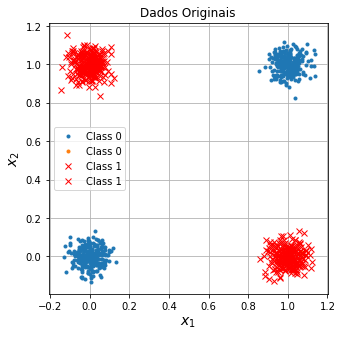

In [82]:
#PLOT DOS DADOS

idx0 = np.argwhere(Y == 0)
idx1 = np.argwhere(Y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Dados Originais')
plt.legend()
plt.grid()
plt.show()

In [83]:
#RESTAURAÇÃO

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [84]:
#FUNÇÃO DE CRIAÇÃO DE MINI-LOTES

def random_batch(x_train, y_train, tamanho):
    indices = np.random.randint(0, len(x_train), tamanho)
    x_lote = x_train[indices]
    y_lote = y_train[indices]
    return x_lote, y_lote

In [85]:
reset_graph()

n_inputs = 2
n_hidden1 = 2
n_hidden2 = 1
n_outputs = 1

In [91]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(np.size(X,1))
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

GradientDescentOptimizer

In [98]:
#CRIAÇÃO DO GRAFO GRADIENT

reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
learning_rate = 0.1

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(x_train, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs", activation = "relu")
    y_proba = tf.sigmoid(logits)

loss = tf.losses.log_loss(y_test, y_proba)

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    


init = tf.global_variables_initializer()

ValueError: Shapes (800, 1) and (200, 1) are incompatible

In [96]:
#EXECUÇÃO DO GRAFO

iteracoes = 40000
tamanho = 1
lotes = int(np.ceil(N / tamanho))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(iteracoes):
        for indice in range(lotes):
            x_lote, y_lote = random_batch(x_train, y_train, tamanho)
            sess.run(training_op, feed_dict={X: x_lote, y: y_lote})
            loss_val = loss.eval({X: x_test, y: y_test})
        
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: x_test, y: y_test})

ValueError: Fetch argument <tf.Operation 'init' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init"
op: "NoOp"
input: "^dnn/hidden1/weights/Assign"
input: "^dnn/hidden1/biases/Assign"
input: "^dnn/hidden2/weights/Assign"
input: "^dnn/hidden2/biases/Assign"
input: "^dnn/outputs/weights/Assign"
input: "^dnn/outputs/biases/Assign"
 is not an element of this graph.)